In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

64
linear_regression_standard 280236f8-2761-485a-8dab-d0c3efd2c011


100%|██████████| 1/1 [00:00<00:00, 26886.56it/s]


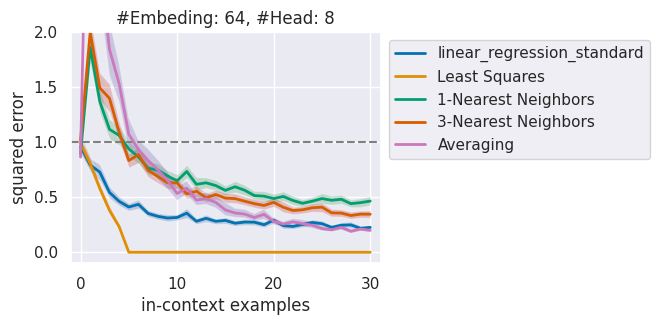

In [5]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir
task = "linear_regression"
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

def function(a):
    for b in a:
        run_id = b[0]
        print(b[1])
        run_path = os.path.join(run_dir, task, run_id)
        recompute_metrics = False

        def valid_row(r):
            return r.task == task and r.run_id == run_id

        metrics = collect_results(run_dir, df, valid_row=valid_row, step=-1)
#         print(metrics['standard'])
        _, conf = get_model_from_run(run_path, only_conf=True)
        n_dims = conf.model.n_dims

        models = relevant_model_names[task]
        basic_plot(metrics["standard"])
        plt.title(f'#Embeding: {b[1]}, #Head: {b[2]}')
        plt.show()

function([
    ('280236f8-2761-485a-8dab-d0c3efd2c011',64,8)
])
        
# if recompute_metrics:
#     get_run_metrics(run_path)  # these are normally precomputed at the end of training

64
linear_regression_standard a8aa2bde-9e63-46bd-a919-a617d6a5513e


100%|██████████| 1/1 [00:00<00:00, 19418.07it/s]


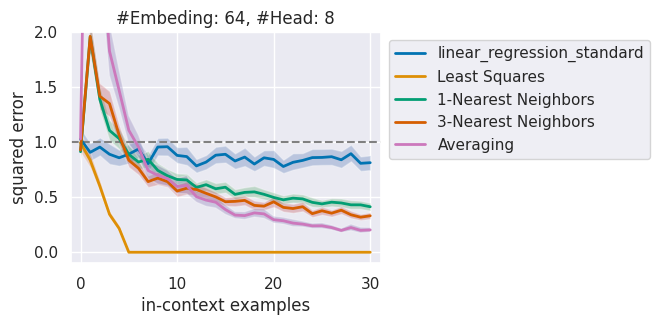

64
linear_regression_standard 686cfe70-bc4b-43ce-9e10-a1259868c01f


100%|██████████| 1/1 [00:00<00:00, 9576.04it/s]


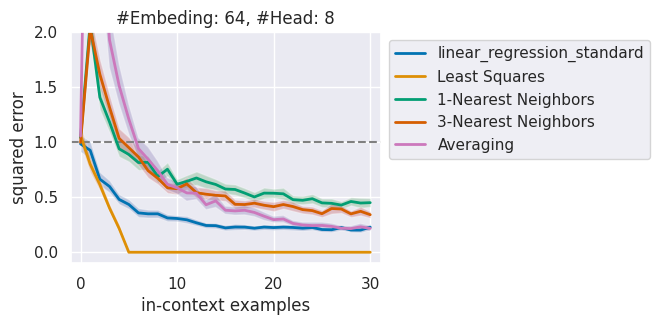

64
linear_regression_standard ff1cd0d3-5382-4391-9bc5-12dacdd5beff


100%|██████████| 1/1 [00:00<00:00, 27962.03it/s]


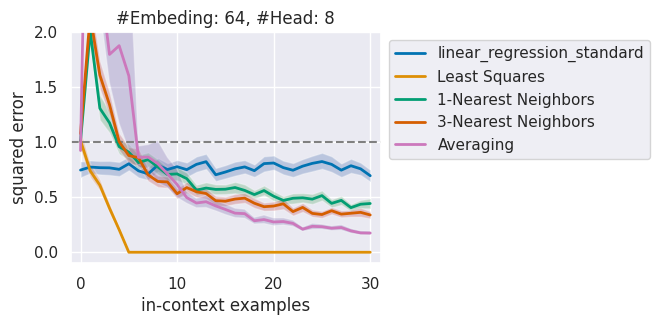

In [9]:
# two layer, E prime, mask vs no mask
df = read_run_dir(run_dir)
task = "linear_regression"

#
function([
    ('a8aa2bde-9e63-46bd-a919-a617d6a5513e',64,8), # 1 layer with mask
    ('686cfe70-bc4b-43ce-9e10-a1259868c01f',64,8), # 2 layer has mask
    ('ff1cd0d3-5382-4391-9bc5-12dacdd5beff',64,8), # 2 layer no mask
])

(64, 8, 'two layer position')


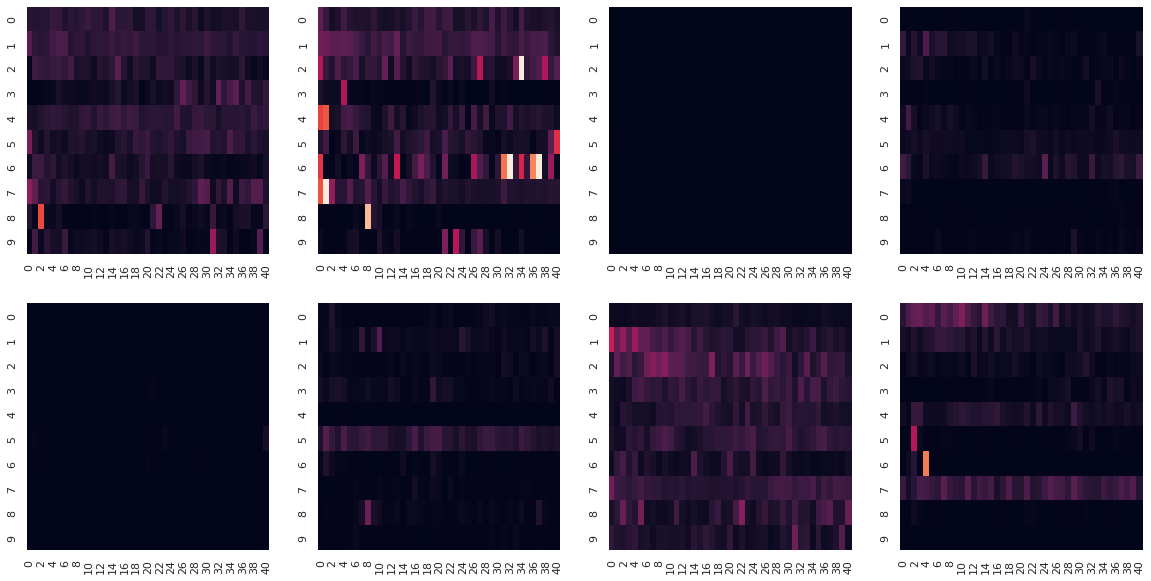

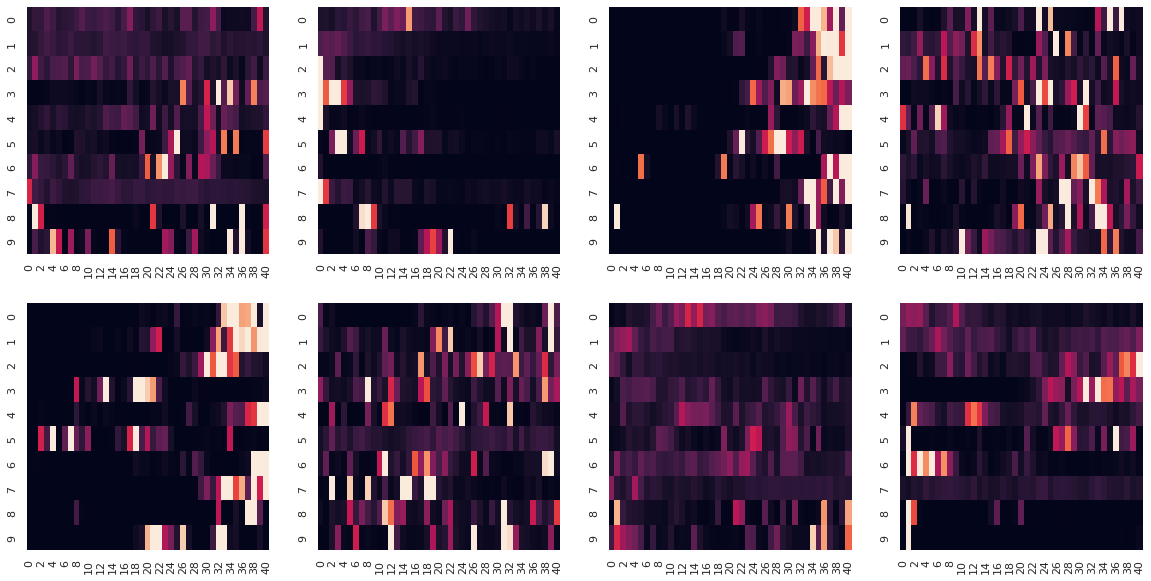

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

df = read_run_dir(run_dir)
df  # list all the runs in our run_dir
task = "linear_regression"
import math
def function(a):
    for b in a:
        run_id = b[0]
        print(b[1])
        run_path = os.path.join(run_dir, task, run_id)
        recompute_metrics = False
        
        data = torch.load(os.path.join(run_path,'attn.pt'))
#         print(data)
#         print(len(data))
        # print(metrics['standard'])
#         print(data[0].shape)
        h = data[1].shape[1]
        fig, axs = plt.subplots(ncols=min(h,4), nrows = math.ceil(h/4),figsize=(min(h,4)*5,5*math.ceil(h/4) ))
        if data[1].shape[1]>1:
            for i in range(data[1].shape[1]):
                r = int(i/4)
                c = i - 4*r
#                 print(r,c)
#                 print(data[0][:10,i,-1,:])
                sns.heatmap(data[1][:10,i,-1,::2].cpu().detach().numpy(), cbar=False, ax=axs[r][c], vmin=0,vmax=0.1)
#                 sns.heatmap(data[0][:10,i,-1,1::2].cpu().detach().numpy(), cbar=False, ax=axs[r][c+1], vmin=0,vmax=0.1)
        else:
            sns.heatmap(data[0][:,0,-1,:].cpu().detach().numpy(), vmin=0,vmax=0.1)
        fig, axs = plt.subplots(ncols=min(h,4), nrows = math.ceil(h/4),figsize=(min(h,4)*5,5*math.ceil(h/4) ))
        if data[0].shape[1]>1:
            for i in range(data[1].shape[1]):
                r = int(i/4)
                c = i - 4*r
#                 print(r,c)
#                 print(data[0][:10,i,-1,:])
#                 sns.heatmap(data[0][:10,i,-1,::2].cpu().detach().numpy(), cbar=False, ax=axs[r][c], vmin=0,vmax=0.1)
                sns.heatmap(data[1][:10,i,-1,1::2].cpu().detach().numpy(), cbar=False, ax=axs[r][c], vmin=0,vmax=0.1)
        else:
            sns.heatmap(data[0][:,0,-1,:].cpu().detach().numpy(), vmin=0,vmax=0.1)
        plt.show()
        
function([
#     ('312d447e-7ae2-4da8-9c84-3bd5dde5a59c',(64,8,'position encoding')),
#          ('6ba8ed25-eca2-4535-b165-c4ee793e03a8',(64,1,'position encoding')),
#          ('a1911ed3-675e-4f3d-b348-0a1301ae8b17',(64,1,'no encoding')),
#          ('7ffdcc9c-6c9b-4dd1-9588-b72990a40685',(64,8,'no encoding')),
# ('0b249f8c-a8d7-4581-92ab-c0dd675d300b',(64,8,'no encoding')),
# ('05bb4b47-411a-43de-a787-b998c41dd842',(64,1,'no encoding')),
# ('fcf4198b-8ffa-45fb-b9f7-cef8a4fbc927',(64,8,'encoding')),
# ('5280a54f-bf22-43b3-93dd-8024a3f4d350',(64,8,'no encoding but position'))
    ('4c2dfff8-0bd3-407c-aad1-90f0dd7fc2c6',(64,8,'two layer position'))
])

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [6]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [7]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

In [8]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
ys = task.evaluate(xs)

In [9]:
with torch.no_grad():
    pred = model(xs, ys)

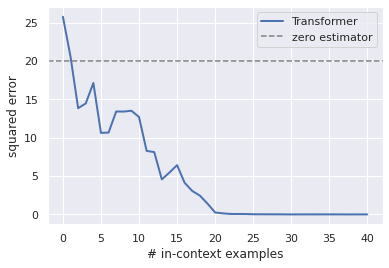

In [10]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [11]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

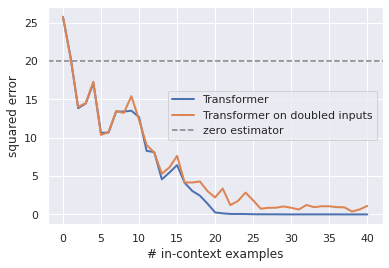

In [12]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.